                            #PROJECT_TITLE 
   #  Microsoft film recomendation analysis
   
 # Author: Karanja Gakio
    

# BUSINESS PROBLEM:

#-To ensure microsoft entry in video content is fun as intended, microsoft new movies studio has to be provided with

#-    viable movie types,their prefered duration and financial gains that will come along the way. using well

#-       selected data i will annalyse  form patterns and make precise recomendations that will make this happen

# DATA UNDERSTANDING:

#-the provided data is in csv format i  picked the files that will solve our business problem stated above that is:

  #-files with ratings
    
  #-files with movie feedback votes

  #-files with income figures 

In [52]:
# loading required functions
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

# loading files and describing their content


In [79]:
# bom movie file provides both domestic,and foreing gross 

bom_df = pd.read_csv('bom.movie_gross.csv')

bom_df.shape

(3387, 5)

In [80]:
# basics file will provide titles,runtime and genres
basic_df = pd.read_csv('title.basics.csv')

basic_df.shape

(146144, 6)

In [81]:
# the ratings file contains average and title_votes
rate_df = pd.read_csv('title.ratings.csv')

rate_df.shape


(73856, 3)

# DATA PREPARATION

In [82]:
# merging the fisrt datasets

pairr_df = pd.merge(basic_df,rate_df,how ='outer',on='tconst')
pairr_df.head(1)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0


In [83]:
# merging the 2nd dataset

pair_df = pd.merge(pairr_df, bom_df, left_on='primary_title', right_on='title', how ='outer')

In [84]:
# now the whole merged dataset

pair_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",7.2,43.0,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,6.9,4517.0,NaN,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN,NaN,NaN


# DATA CLEANING

In [59]:
# looking at dataset original shape before cleaning

pair_df.shape

(146927, 13)

-#- i proceed to drop columns that wont be usefull in solving our business problem that is FINDING (TITLE, RATES,RANKS and income)




In [60]:
# before droping i confirm the null values in the dataset

#checking for duplicates 

pair_df.duplicated().any()

False

In [61]:
#checking for missing values

pair_df.isnull().values.any()

True

tconst                781
primary_title         782
original_title        803
start_year            781
runtime_minutes     32520
genres               6189
averagerating       73069
numvotes            73069
title              142780
studio             142785
domestic_gross     142815
foreign_gross      144411
year               142780
dtype: int64


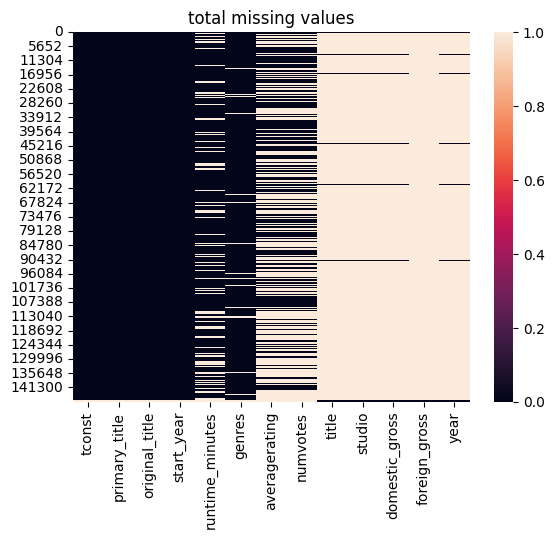

In [62]:
# checking total missing values and visualizing the result

print(pair_df.isnull().sum())
sns.heatmap(pair_df.isnull())
plt.title('total missing values')
plt.show()

In [63]:
# missing values in percentage rounded off to the nearest number

percentage_missing = pair_df.isnull().sum() * 100/len(pair_df)

round(percentage_missing)

tconst              1.0
primary_title       1.0
original_title      1.0
start_year          1.0
runtime_minutes    22.0
genres              4.0
averagerating      50.0
numvotes           50.0
title              97.0
studio             97.0
domestic_gross     97.0
foreign_gross      98.0
year               97.0
dtype: float64

In [85]:
# i confirmed the number of identicle values in original_title and primary_title to avoid droping vital data

len(set(pair_df['original_title']).intersection(pair_df['primary_title']))

123709

In [86]:
# dropped the unnecesary columns
pair_df.drop(['original_title','studio','title','year',],axis=1,inplace=True)

pair_df.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross
0,tt0063540,Sunghursh,2013.0,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,2019.0,114.0,"Biography,Drama",7.2,43.0,NaN,NaN
2,tt0069049,The Other Side of the Wind,2018.0,122.0,Drama,6.9,4517.0,NaN,NaN
3,tt0069204,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",6.1,13.0,NaN,NaN
4,tt0100275,The Wandering Soap Opera,2017.0,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN


#- for the domestic and foreing gross columns we fill the missing values with median

In [87]:
# turning the foreign_gross column into a float  

pair_df['foreign_gross'] = pd.to_numeric(pair_df.foreign_gross, errors = 'coerce')


In [88]:
# printing their median 

print(' domestic median', pair_df['domestic_gross'].median())
print(' foreign median', pair_df['foreign_gross'].median())

 domestic median 1500000.0
 foreign median 17800000.0


In [91]:
# filling for domestic_gross column

pair_df['domestic_gross'].fillna(pair_df['domestic_gross'].median(), inplace = True)

In [95]:
# filling for foreign_gross column

pair_df['foreign_gross'].fillna(pair_df['foreign_gross'].median(), inplace = True)

In [96]:
# droping the remaining null values

pair_df.dropna(axis=0, inplace = True)

In [99]:
# confirming the cleaner data as well as its progresive shape

print(pair_df.shape)
pair_df.isnull().sum()

(65722, 9)


tconst             0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
domestic_gross     0
foreign_gross      0
dtype: int64

# we finalize cleaning by dealing with the  outliers

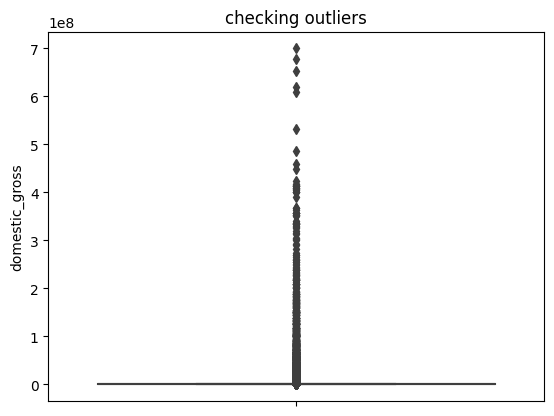

In [101]:
# ploting to visualy see any outliers 

sns.boxplot(y =pair_df['domestic_gross'], data = pair_df)
plt.title('checking outliers')
plt.show()

In [103]:
#the box plot shows alot of outliers , here i will confirm by comparing data aggregates

pair_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross
count,65722.000000,65722.000000,65722.000000,6.572200e+04,6.572200e+04,6.572200e+04
mean,2014.258072,94.732662,6.320900,3.954573e+03,2.810652e+06,1.946044e+07
std,2.600140,209.373849,1.458856,3.208775e+04,1.544777e+07,2.509073e+07
min,2010.000000,3.000000,1.000000,5.000000e+00,1.000000e+02,6.000000e+02
25%,2012.000000,81.000000,5.500000,1.600000e+01,1.500000e+06,1.780000e+07
50%,2014.000000,91.000000,6.500000,6.200000e+01,1.500000e+06,1.780000e+07
75%,2016.000000,104.000000,7.300000,3.520000e+02,1.500000e+06,1.780000e+07
max,2019.000000,51420.000000,10.000000,1.841066e+06,7.001000e+08,9.464000e+08


In [104]:
# to remove the outliers we get the limits first

upper_limit = pair_df['runtime_minutes'].mean() + 3* pair_df['runtime_minutes'].std()
lower_limit = pair_df['runtime_minutes'].mean() - 3* pair_df['runtime_minutes'].std()



In [105]:
# next we get the outliers 

pair_df.loc[(pair_df['runtime_minutes']> upper_limit) | (pair_df['runtime_minutes'] < lower_limit)]

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross
29559,tt2008009,The Clock,2010.0,1440.0,Drama,8.9,219.0,1500000.0,17800000.0
38910,tt2261469,Double Fine Adventure,2015.0,724.0,Documentary,8.5,59.0,1500000.0,17800000.0
50180,tt2659636,Modern Times Forever,2011.0,14400.0,Documentary,6.2,69.0,1500000.0,17800000.0
125807,tt7528992,Europa: The Last Battle,2017.0,746.0,Documentary,8.2,162.0,1500000.0,17800000.0
133586,tt8273150,Logistics,2012.0,51420.0,Documentary,5.0,17.0,1500000.0,17800000.0
137158,tt8677246,Bullfighting Memories,2017.0,1100.0,"Comedy,History",8.6,5.0,1500000.0,17800000.0
140337,tt9047474,La flor,2018.0,808.0,"Drama,Fantasy,Musical",8.5,100.0,1500000.0,17800000.0


In [106]:
#deleting the outliers by making a new data set without them

pair_df = pair_df.loc[(pair_df['runtime_minutes']< upper_limit) & (pair_df['runtime_minutes'] > lower_limit)]
pair_df

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross
0,tt0063540,Sunghursh,2013.0,175.0,"Action,Crime,Drama",7.0,77.0,1500000.0,17800000.0
1,tt0066787,One Day Before the Rainy Season,2019.0,114.0,"Biography,Drama",7.2,43.0,1500000.0,17800000.0
2,tt0069049,The Other Side of the Wind,2018.0,122.0,Drama,6.9,4517.0,1500000.0,17800000.0
4,tt0100275,The Wandering Soap Opera,2017.0,80.0,"Comedy,Drama,Fantasy",6.5,119.0,1500000.0,17800000.0
8,tt9181914,Bigfoot,2018.0,86.0,"Animation,Family",2.5,55.0,1500000.0,17800000.0
...,...,...,...,...,...,...,...,...,...
146116,tt9910930,Jeg ser deg,2019.0,75.0,"Crime,Documentary",6.1,7.0,1500000.0,17800000.0
146121,tt9911774,Padmavyuhathile Abhimanyu,2019.0,130.0,Drama,8.4,365.0,1500000.0,17800000.0
146122,tt9913056,Swarm Season,2019.0,86.0,Documentary,6.2,5.0,1500000.0,17800000.0
146123,tt9913084,Diabolik sono io,2019.0,75.0,Documentary,6.2,6.0,1500000.0,17800000.0


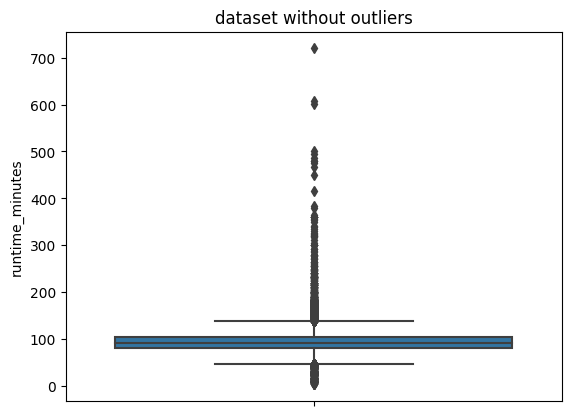

In [192]:
# confirming the cleaner data 

sns.boxplot( y = pair_df['runtime_minutes'], data = pair_df)
plt.title('dataset without outliers')
plt.show()

# next i analyse the values so as to form the required patterns that will in the end make recommendations

In [109]:
# i begin  with genre general mass production count 

per_genre = []   #  first i create 2 empty lists                   
elist = []

for genre in pair_df['genres']:   # separate each values with a coma for easy listing
    elist.append(genre.split(',')) 
    
for each in elist:                  
    for each1 in each:               #append the new values in the 2nd list - value for value
        per_genre.append(each1)     
        
from collections import Counter      # import collections function for easy counting
movie_genre = Counter(per_genre)  

# displaying the genre production_counts in the dict_below in desceding order

genre_dict = dict(movie_genre)
genre_dict =dict(sorted(genre_dict.items(),key= lambda x:x[1],reverse=True))
genre_dict

{'Drama': 28392,
 'Documentary': 16419,
 'Comedy': 15513,
 'Thriller': 7584,
 'Horror': 6918,
 'Action': 6297,
 'Romance': 5976,
 'Crime': 4338,
 'Biography': 3693,
 'Adventure': 3621,
 'Family': 3231,
 'Mystery': 2889,
 'History': 2703,
 'Sci-Fi': 2048,
 'Fantasy': 1968,
 'Music': 1844,
 'Animation': 1615,
 'Sport': 1099,
 'War': 795,
 'Musical': 637,
 'News': 575,
 'Western': 256,
 'Reality-TV': 13,
 'Game-Show': 2,
 'Adult': 2,
 'Short': 1}

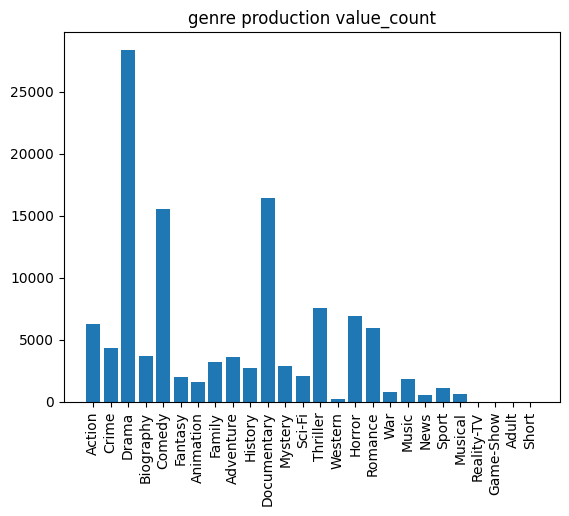

In [110]:
# visualizing the genre result for better perception

genres = []
values = list(movie_genre.values())
for typ in movie_genre:
    genres.append(typ)
y_pos = range(0,len(values))
plt.bar(y_pos, values)
plt.xticks(y_pos,genres, rotation=90)
plt.title('genre production value_count')
plt.show()


In general  DRAMA, DOCUMENTARY , COMEDY,THRILLER , HORROR, ACTION, proves to be highest genre produced 

For clear genre recomendation we proceed with checking what genres will top the list by high votes and rates 

In [125]:
# I begin by grouping  genres by average_rate

by_rate = pair_df.groupby('genres')['averagerating'].max().sort_values(ascending= False)
by_rate = by_rate.to_frame().head(20)

by_rate.head(5)

,averagerating
genres,
"Comedy,Drama",10.0
"Adventure,Comedy",10.0
"Documentary,History",10.0
Documentary,10.0
"Crime,Documentary",10.0


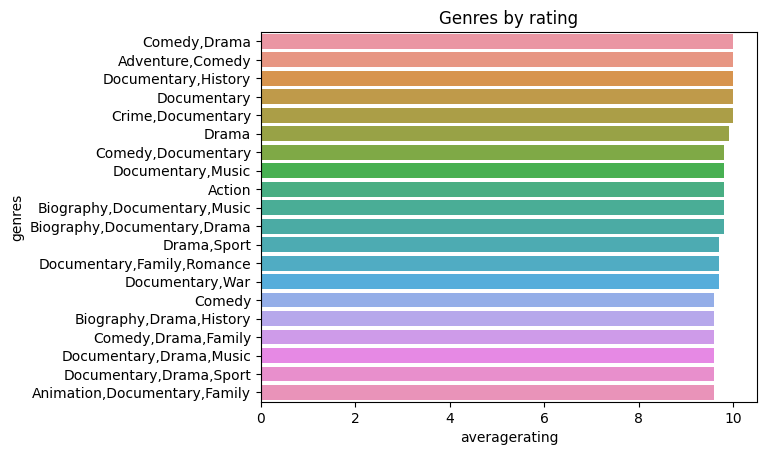

In [124]:
# visualizing the highly rated genres 

sns.barplot(x ='averagerating' , y=by_rate.index, data= by_rate)

plt.title('Genres by rating')
plt.show()

# COMEDY, DRAMA, ADVENTURE, DOCUMENTARY tops the list of the highly rated genres 
    
    

-# i proceed with the analysis this time by number of votes  

In [127]:
# top genres by votes 

by_votes = pair_df.groupby('genres')['numvotes'].max().sort_values(ascending= False)
by_votes = by_votes.to_frame().head(20)

by_votes.head(5)

,numvotes
genres,
"Action,Adventure,Sci-Fi",1841066.0
"Action,Thriller",1387769.0
"Adventure,Drama,Sci-Fi",1299334.0
"Drama,Western",1211405.0
"Biography,Crime,Drama",1035358.0


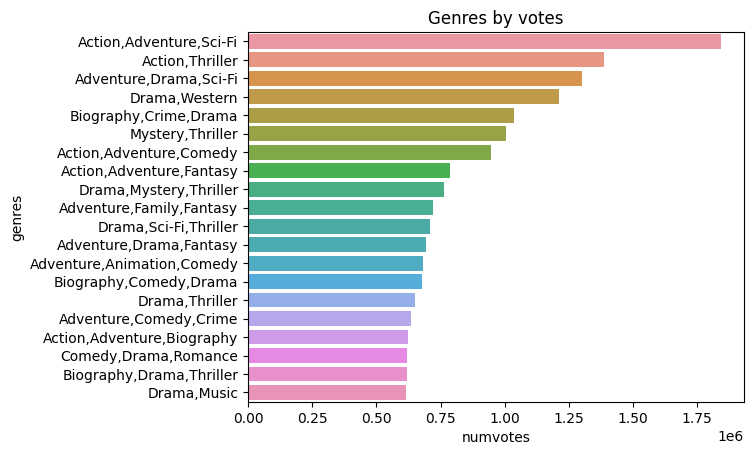

In [128]:
# visualizing the highly voted genres 

sns.barplot(x ='numvotes' , y=by_votes.index, data= by_votes)

plt.title('Genres by votes')
plt.show()

# ACTION , ADVENTURE,SCIFI,THRILER, DRAMA  tops the chart of the highly voted genres

-# i proceed with the analysis this time usisng  domestic_gross

In [130]:
# top genres by domestic gross 

by_dgross = pair_df.groupby('genres')['domestic_gross'].max().sort_values(ascending= False)
by_dgross = by_dgross.to_frame().head(20)

by_dgross.head(5)

,domestic_gross
genres,
"Action,Adventure,Sci-Fi",700100000.0
"Action,Adventure,Fantasy",620200000.0
"Action,Adventure,Animation",608600000.0
"Adventure,Animation,Comedy",486300000.0
"Action,Thriller",448100000.0


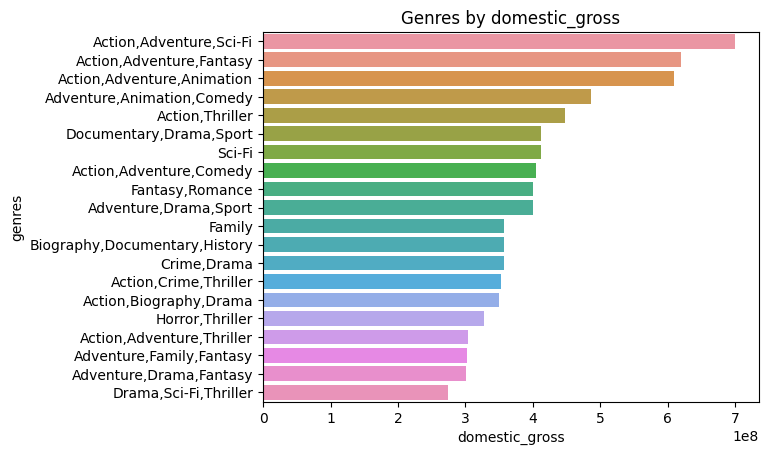

In [132]:
# visualizing by top genres by high domestic_gross 

sns.barplot(x ='domestic_gross' , y=by_dgross.index, data= by_dgross)

plt.title('Genres by domestic_gross')
plt.show()

# ACTION , ADVENTURE,SCIFI,FANTASY, COMEDY tops the chart of  genres BY max domestic_ gross

-# i finalize the genre analysis by checking top genres by foreign_gross

In [133]:
# top genres by foreign gross 

by_fgross = pair_df.groupby('genres')['foreign_gross'].max().sort_values(ascending= False)
by_fgross = by_fgross.to_frame().head(20)

by_fgross.head(5)

,foreign_gross
genres,
"Action,Adventure,Sci-Fi",946400000.0
"Adventure,Drama,Sport",875700000.0
"Fantasy,Romance",875700000.0
"Adventure,Animation,Comedy",875700000.0
"Action,Drama,Thriller",867600000.0


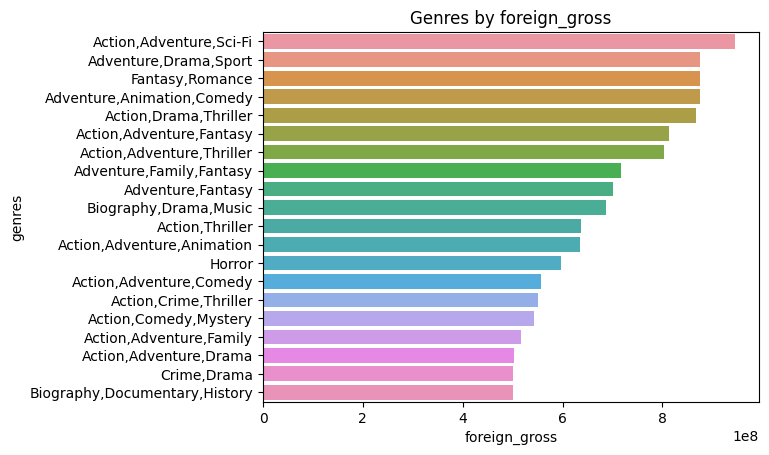

In [134]:
# visualizing genres by high foreign_gross 

sns.barplot(x ='foreign_gross' , y=by_fgross.index, data= by_fgross)

plt.title('Genres by foreign_gross')
plt.show()

# ACTION , ADVENTURE,SCIFI,FANTASY, DRAMA tops the chart of genres BY max FOREIGN_ gross¶

-# i proceed the analysis this time looking for the most prefered runtime_minute

corelation = -0.03581237120221966


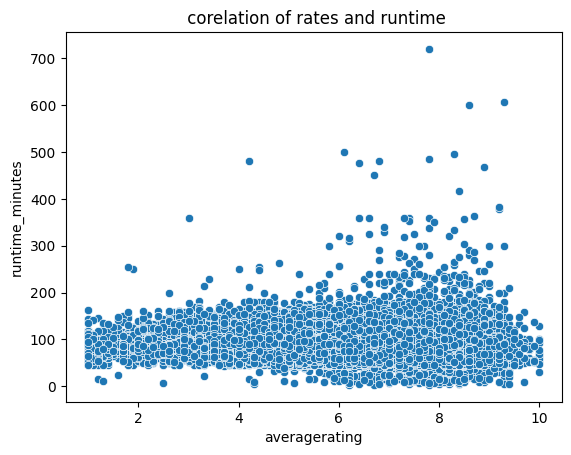

In [189]:
# we first get the correlation between averagerating and runtime_minutes

print( 'corelation =',pair_df['runtime_minutes'].corr(pair_df['averagerating']))

#visualizing the result for better analysis

sns.scatterplot(x='averagerating',y='runtime_minutes',data=pair_df)
plt.title(' corelation of rates and runtime')
plt.show()

-# the above analysis had negative corelation we can also note how average-rating clustered where runtime minutes is below (200)

corelation = 0.11378391696631243


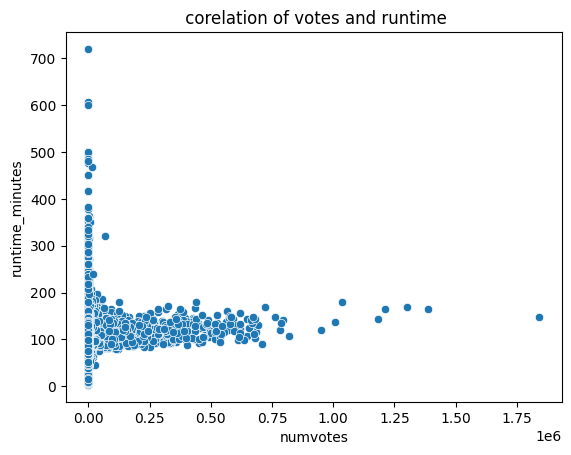

In [190]:
# checking the corelation of runtime_minutes with numvotes

print( 'corelation =',pair_df['numvotes'].corr(pair_df['runtime_minutes']))

# visualizing the result

sns.scatterplot(x='numvotes',y='runtime_minutes',data=pair_df)
plt.title(' corelation of votes and runtime')
plt.show()

# runtime minutes below 200 proves to be most prefered both by averagerating and votes

# EVALUATION

In [279]:
# genre evaluation 
a = ['Drama','Documentary','Comedy','Thriller','Horror']   # top 5 mass genres by production 
b = list(by_rate.head(10).index)                       #top genres by rate
c = list(by_votes.head(10).index)                 #top genres by votes
d = list(by_dgross.head(10).index)              #top genres by domestic_gross
e = list(by_fgross.head(10).index)            #top genres by foreign_gross
kapu = []
for q in a:
    kapu.append(q)
for w in b:
    kapu.append(w)
for l in c:
    kapu.append(l)
for n in d:
    kapu.append(n)
for x in e:
    kapu.append(x)
film_genre =dict(Counter(kapu))      
film_genre = pd.DataFrame.from_dict(film_genre, orient = 'index')
film_genre = film_genre.sort_values(by=[0], ascending=False).head(10)
print( 'top genres ')
film_genre

top genres 


,0
"Action,Adventure,Fantasy",3
"Action,Adventure,Sci-Fi",3
Drama,2
"Adventure,Family,Fantasy",2
Documentary,2
"Action,Thriller",2
"Adventure,Animation,Comedy",2
"Fantasy,Romance",2
"Adventure,Drama,Sport",2
"Action,Adventure,Comedy",2


# CONCLUSIONS

#    # in compliance with the above genre analysis i will recommend  microsoft new moviestudio to make movies of genre (1-Action 2-Adventure 3-Drama 4-fantasy 5-comedy ) .They must also make sure the movie runtime_minutes are below 200 mnts so as to remain safe in the competetive market. the recommended films  are viable enough to generate safe gains of upto 7M to keep it running